# Eigenproblem for Quantum Optical Models: Driven Jaynes Cummings Model

This Notebook contains numerical routines that support the findings in arxiv:

## Jaynes Cummings Model with the atom being driven

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import linalg as LA
try:
    import matplotlib.pyplot as plt
except ImportError:
    pass
from matplotlib.pyplot import *

### Fitting function

In [2]:
def func(x, a, b, c):
    return a * ((-b)**x) + c

### Parameters

In [3]:
t_intra = -1.0
t_inter = -2.0

Delt = 0.

### Attributes

In [4]:
cells = 100
cell_sites = 2

### Form the lattice degree of freedom

In [5]:
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL

sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)

In [6]:
b20 = np.zeros((2,2))
b20[0,0]=1
b21 = np.zeros((2,2))
b21[1,1]=1
PB_L = np.kron(np.eye(int(cells)), b20)
PA_L = np.kron(np.eye(int(cells)), b21)

i:  0
t_AA:  -0.0
i:  1
t_AA:  -0.01
i:  2
t_AA:  -0.02
i:  3
t_AA:  -0.03
i:  4
t_AA:  -0.04
i:  5
t_AA:  -0.05
i:  6
t_AA:  -0.06
i:  7
t_AA:  -0.07
i:  8
t_AA:  -0.08
i:  9
t_AA:  -0.09
i:  10
t_AA:  -0.1
i:  11
t_AA:  -0.11
i:  12
t_AA:  -0.12
i:  13
t_AA:  -0.13
i:  14
t_AA:  -0.14
i:  15
t_AA:  -0.15
i:  16
t_AA:  -0.16
i:  17
t_AA:  -0.17
i:  18
t_AA:  -0.18
i:  19
t_AA:  -0.19
i:  20
t_AA:  -0.2
i:  21
t_AA:  -0.21
i:  22
t_AA:  -0.22
i:  23
t_AA:  -0.23
i:  24
t_AA:  -0.24
i:  25
t_AA:  -0.25
i:  26
t_AA:  -0.26
i:  27
t_AA:  -0.27
i:  28
t_AA:  -0.28
i:  29
t_AA:  -0.29
i:  30
t_AA:  -0.3
i:  31
t_AA:  -0.31
i:  32
t_AA:  -0.32
i:  33
t_AA:  -0.33
i:  34
t_AA:  -0.34
i:  35
t_AA:  -0.35000000000000003
i:  36
t_AA:  -0.36
i:  37
t_AA:  -0.37
i:  38
t_AA:  -0.38
i:  39
t_AA:  -0.39
i:  40
t_AA:  -0.4
i:  41
t_AA:  -0.41000000000000003
i:  42
t_AA:  -0.42
i:  43
t_AA:  -0.43
i:  44
t_AA:  -0.44
i:  45
t_AA:  -0.45
i:  46
t_AA:  -0.46
i:  47
t_AA:  -0.47000000000000003
i:  48
t_A

NameError: name 'tA_array' is not defined

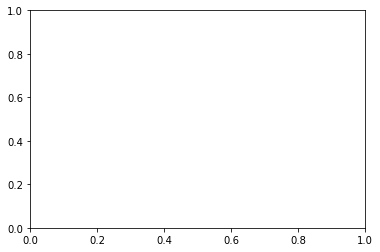

In [7]:
ntA = 101
Ess = np.zeros((2*cells, ntA))
tAA_array = np.zeros((1, ntA))


A_PB = np.zeros((1, ntA))
A_PA = np.zeros((1, ntA))


for i in range(ntA):
    t_A = 0.0
    t_B = t_A
    t_AA = -0.01 * i
    t_BB = t_AA
    tAA_array[0,i] = t_AA
    print("i: ",i)
    print('t_AA: ',t_AA)
    Delt = 0.

    Hcell = np.array([[Delt, t_intra], [t_intra,0]])
    T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
    T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
    

    T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
    T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])

    SSH_Ham = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
     + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
    
    eigenvalues, eigenvectors = LA.eig(SSH_Ham)
    # sorting
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    
    
    
    Ess[:,i]=eigenvalues

    inx = np.arange(2*cells)
#    plt.stem(inx, eigenvalues, use_line_collection = True) 
#    plt.show() 


    ESs = eigenvectors

#    plt.stem(inx, np.real(ESs[cells]), use_line_collection = True) 
#    plt.show() 

    xA = np.linspace(0, 2*cells-1, 2*cells)

    # Pick the edge state from all eigenstates
    EDG1 = ESs[cells-1]
    EDG2 = ESs[cells]


    xsA = np.linspace(0, cells-1, cells)

    xsB = np.empty((xsA.size + xsA.size,), dtype=xsA.dtype)
    xsB[0::2] = xsA
    xsB[1::2] = xsA

    xsA_B = xsB - (xsB[int(cells-1)]+xsB[int(cells)])/2

    WED2=np.sum(np.multiply(xsA_B, np.abs(EDG2).T )  )

    WED1=np.sum(np.multiply(xsA_B, np.abs(EDG1).T )  )

    if WED1 < WED2:
        EDG = EDG1
    elif WED1 > WED2:
        EDG = EDG2
    


    Es_LA = np.abs(PA_L*EDG)
    Es_LB = np.abs(PB_L*EDG)
#    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#    ax1.plot(xA, Es_LA, label="LeftEdgeState_A")
#    ax2.plot(xA, Es_LB, label="LeftEdgeState_B")
##    ax1.legend()
##    ax2.legend()
#    plt.show()
#    fig.suptitle('Mid-gap Edge states: Localized on left boundary')
#    plt.close()


    xsA = np.linspace(0, cells-1, cells)
    ###############################################################################
    ###############################################################################
    popt_LB, pcov_LB = curve_fit(func, xsA, Es_LB[1:2*cells:2,0], p0 = (np.sqrt(3)/2, 1/3, 1))
    #popt
    #array([2.56274217, 1.37268521, 0.47427475])
#    plt.plot(xsA, func(xsA, *popt_LB), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB))
#    plt.plot(xsA, Es_LB[1:2*cells:2,0]+0.001, 'b-',label="State1")
#    plt.xlim(0, 16)
#    plt.ylim(0, 0.1)
#    plt.grid()
#    plt.show()
    ###############################################################################
    ###############################################################################
    popt_LA, pcov_LA = curve_fit(func, xsA, Es_LA[0:2*cells:2,0], p0 = (np.sqrt(3)/2, 1/3, 1))
    #popt
    #array([2.56274217, 1.37268521, 0.47427475])
#    plt.plot(xsA, func(xsA, *popt_LA), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA))
#    plt.plot(xsA, Es_LA[0:2*cells:2,0]+0.005, 'b-',label="State1")
#    plt.xlim(0, 16)
#    plt.ylim(0, 1)
#    plt.grid()
#    plt.show()

    A_PB[0,i] = popt_LB[0]
    A_PA[0,i] = popt_LA[0]


tA_ind = np.arange(0, ntA)


fig, ax = subplots()
plt.plot(np.abs(tA_array).T, Ess.T)
plt.plot(0.25,0.25,'ro')
plt.plot(0.75,0.75,'ro')
plt.xlim(0, 1)
plt.ylim(-2, 3)

ax.set_xlabel('$|J_1|$', **axis_font);
ax.set_ylabel("Eigen energy", **axis_font);
plt.tick_params(labelsize=18)
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('correct6.pdf')
plt.show()
plt.close()



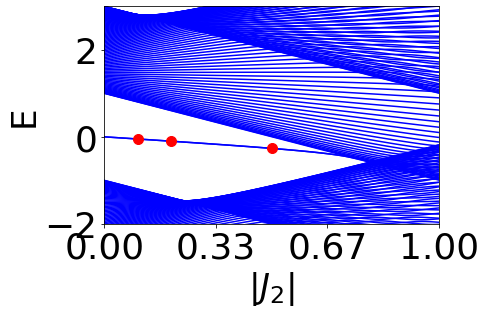

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [8]:
axis_font = {'size':'34'}
fig, ax = subplots()
plt.plot(np.abs(tAA_array).T, Ess.T, 'b-')
#plt.plot(np.abs(tA_array[cells/2]).T, Ess[cells/2].T, 'g-')
plt.plot(0.1,-0.05009,'ro', markersize=10)
plt.plot(0.2,-0.10078,'ro', markersize=10)
plt.plot(0.5,-0.26584,'ro', markersize=10)
plt.xlim(0, 1)
plt.ylim(-2, 3)
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=30)
ax.set_xlabel('$|J_2|$', **axis_font);
#ax.set_ylabel("Eigen energy", **axis_font);
ax.set_ylabel("E", **axis_font);
plt.tick_params(labelsize=36)
#plt.gca().set_prop_cycle(color=['blue'])
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('bands.png')
plt.show()
plt.close()
plt.figure(figsize=(2,2))

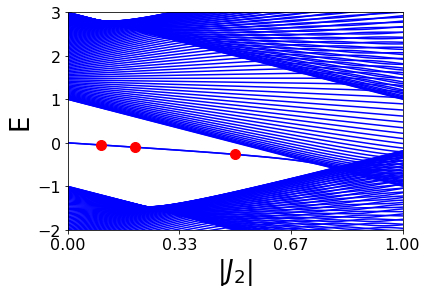

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [9]:
axis_font = {'size':'26'}
fig, ax = subplots()
plt.plot(np.abs(tAA_array).T, Ess.T, 'b-')
#plt.plot(np.abs(tA_array[cells/2]).T, Ess[cells/2].T, 'g-')
plt.plot(0.1,-0.05009,'ro', markersize=10)
plt.plot(0.2,-0.10078,'ro', markersize=10)
plt.plot(0.5,-0.26584,'ro', markersize=10)

#plt.plot(0.90,0.90,'ro', markersize=7)
plt.xlim(0, 1)
plt.ylim(-2, 3)
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('$|J_2|$', **axis_font);
#ax.set_ylabel("Eigen energy", **axis_font);
ax.set_ylabel("E", **axis_font);
#plt.tick_params(labelsize=36)
#plt.gca().set_prop_cycle(color=['blue'])
#ax.legend(("Numerical (sublattice B)","fitting curve",
#           "Numerical (sublattice A)","fitting curve") 
#           ,loc='upper right', bbox_to_anchor=(1.00, 0.9), prop={'size': 14} );
#show()
plt.savefig('bands.png')
plt.show()
plt.close()
plt.figure(figsize=(2,2))

## $J_1$=0, $J_2$ =  -0.1

## Set parameters

In [12]:
t_intra = -1.0
t_inter = -2.0
J1 = -0.0
J2 = -0.1

t_A = J1
t_B = t_A

t_AA = J2
t_BB = t_AA

Delt = 0.

## Attributes

In [13]:
cells = 100
cell_sites = 2
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL

### Form the Lattice Hamiltonian

### Unit Cells and couple submatrices

In [14]:
Hcell = np.array([[Delt, t_intra], [t_intra,0]])
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])

T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])

In [15]:
Hcell = np.array([[Delt, t_intra], [t_intra,0]])
inter_hop = [T_inter_cell_0, T_inter_cell_1]

Latt_Ham0 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)

In [16]:
Latt_Ham0

array([[ 0., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  0., -2., ...,  0.,  0.,  0.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -2.,  0.],
       [ 0.,  0.,  0., ..., -2.,  0., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.]])

In [17]:
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_0 = np.linspace(0, cells-1, cells)

### Calculate and Plot The Eigenspectrum

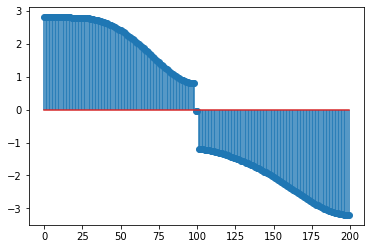

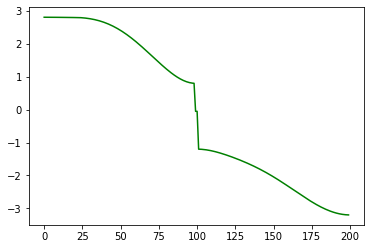

In [18]:
eigenvalues, eigenvectors = LA.eig(Latt_Ham0)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

#Plotting
e_indx = np.arange(2*cells)
plt.stem(e_indx, np.real(eigenvalues), use_line_collection = True) 
plt.show() 

fig, ax = subplots()
plt.plot(e_indx, np.real(eigenvalues), 'g',label="r$|1 \rangle$")

In [19]:
indx_no = cells-1
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))

### Resolve into Sublattices

In [20]:
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################

In [21]:
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG

Some data handling:

In [22]:
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

### Plotting Sublattice-wise

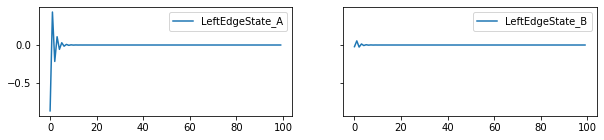

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
ax1.plot(x_subL_0, np.real(EsLA_f), label="LeftEdgeState_A")
ax2.plot(x_subL_0, np.real(EsLB_f), label="LeftEdgeState_B")

ax1.legend()
ax2.legend()

plt.show()
fig.suptitle('Mid-gap Edge states: Localized')
plt.close()

More Data handling:

/tmp/ipykernel_9966/43643998.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))
/tmp/ipykernel_9966/43643998.py:15: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))


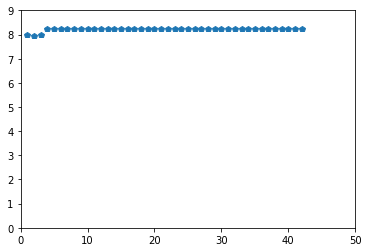

In [24]:
# copying to python array to take a elementwise division
EsLB_0 = np.zeros(cells, dtype=complex)
EsLA_0 = np.zeros(cells, dtype=complex)

Negate = -1 # We negate the eigenvectors for making the final plot.

Vtol = 1E-13
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_0[i] = Negate*EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_0[i] = Negate*EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_0, EsLA_0))
Ratio_Array = np.abs(np.divide(EsLA_0, EsLB_0))

plt.plot(x_subL_0, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 50)
plt.ylim(0, 9)
plt.show()

EsLB_, EsLA_ are to be fitted with a geometric series shape.

### Curve Fitting

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


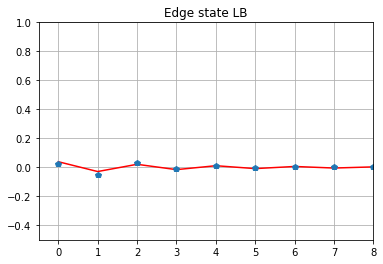

In [25]:
###############################################################################
popt_LB_0, pcov_LB_0 = curve_fit(func, x_subL_0, EsLB_0, p0 = (np.sqrt(3)/2, 1/2, 0))
plt.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_0))
plt.plot(x_subL_0, EsLB_0+0.00, 'p',label="StateB")
plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)
plt.grid()
plt.title('Edge state LB')
plt.show()
plt.close()
###############################################################################

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


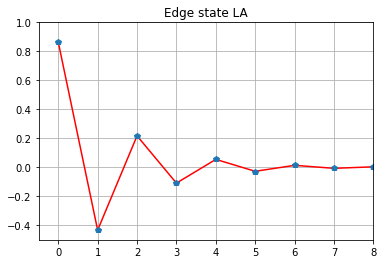

In [26]:
###############################################################################
popt_LA_0, pcov_LA_0 = curve_fit(func, x_subL_0, EsLA_0, p0 = (np.sqrt(3)/2, 1/2, 0))
plt.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_0))
plt.plot(x_subL_0, EsLA_0+0.000, 'p',label="StateA")
plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)
plt.grid()
plt.title('Edge state LA')
plt.show()
plt.close()
###############################################################################

In [27]:
# Product state Check
Ratio_Array

array([39.79925947,  7.97988958,  7.93186752,  7.99585053,  8.24813531,
        8.23677143,  8.223425  ,  8.21563382,  8.21686956,  8.2176143 ,
        8.21780011,  8.21771911,  8.2176886 ,  8.21768685,  8.21769099,
        8.21769196,  8.21769181,  8.21769163,  8.2176916 ,  8.21769161,
        8.21769163,  8.21769164,  8.21769164,  8.21769157,  8.21769136,
        8.21769147,  8.21769214,  8.21769245,  8.21769193,  8.21769337,
        8.2176842 ,  8.21767667,  8.21771947,  8.21770888,  8.21789379,
        8.21793468,  8.21723346,  8.21771802,  8.21632425,  8.21378262,
        8.22514462,  8.22000425,  8.22437693,         inf,         inf,
               inf,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


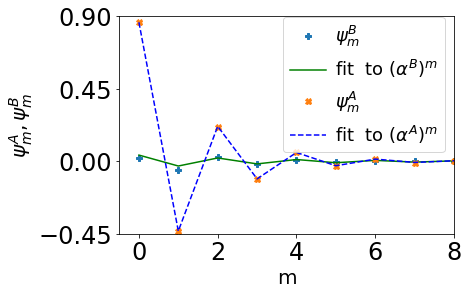

<Figure size 144x144 with 0 Axes>

In [28]:
axis_font = {'size':'20'}
###############################################################################
fig, ax = subplots()
plt.plot(x_subL_0, EsLB_0+0.00, 'P',label="StateB")
plt.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_0))
plt.plot(x_subL_0, EsLA_0+0.000, 'X',label="StateA")
plt.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_0))

plt.xlim(-0.5, 8)
plt.ylim(-0.45, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.00, 1.04), prop={'size': 18} )
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_0.png')

## $J_1$=-0.20

In [29]:
cells = 100
J1 = 0.
t_A = J1
t_B = t_A
J2 = -0.20
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham1 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)

# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_1 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham1)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells-1
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

########### If the curves are not localized on the left, we have to
########### to come back here to change between True and False
    
do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_9966/123882405.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))
/tmp/ipykernel_9966/123882405.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))


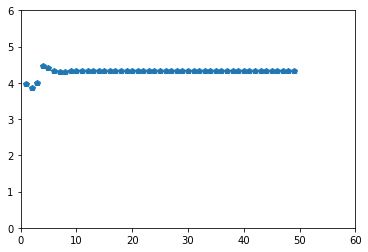

In [30]:
# copying to python array to take a elementwise division
EsLB_1 = np.zeros(cells, dtype=complex)
EsLA_1 = np.zeros(cells, dtype=complex)

Vtol = 1E-13
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_1[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_1[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_1, EsLA_1))
Ratio_Array = np.abs(np.divide(EsLA_1, EsLB_1))

plt.plot(x_subL_1, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 60)
plt.ylim(0, 6)
plt.show()

In [31]:
Ratio_Array

array([19.59392126,  3.95909024,  3.86291236,  3.99075161,  4.47369519,
        4.39835288,  4.32403955,  4.29307811,  4.31223295,  4.3214537 ,
        4.32111772,  4.31806978,  4.31751639,  4.31799433,  4.31831649,
        4.31827702,  4.31819283,  4.31817472,  4.31819121,  4.31820014,
        4.3181989 ,  4.31819627,  4.31819581,  4.31819631,  4.31819658,
        4.31819654,  4.31819646,  4.31819644,  4.31819656,  4.31819656,
        4.31819652,  4.31819654,  4.31819602,  4.31819474,  4.31819398,
        4.31819367,  4.31819201,  4.31820324,  4.3182043 ,  4.31815969,
        4.31821736,  4.3182111 ,  4.31824825,  4.31861627,  4.31821702,
        4.31845994,  4.32036815,  4.32452962,  4.32588965,  4.33290574,
               inf,         inf,         inf,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


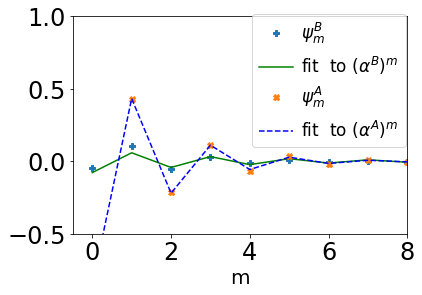

<Figure size 144x144 with 0 Axes>

In [32]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_1, pcov_LB_1 = curve_fit(func, x_subL_1, EsLB_1, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_1, pcov_LA_1 = curve_fit(func, x_subL_1, EsLA_1, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_1, EsLB_1+0.00, 'P',label="StateB")
plt.plot(x_subL_1, func(x_subL_1, *popt_LB_1), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_1))
plt.plot(x_subL_1, EsLA_1+0.000, 'X',label="StateA")
plt.plot(x_subL_1, func(x_subL_1, *popt_LA_1), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_1))

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 1.0)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.02, 1.05), prop={'size': 17} );
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_1.png')

## $J_2$=-0.3

In [33]:
cells = 100
J1 = -0.
t_A = J1
t_B = t_A
J2 = -0.3
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham2 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_2 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham2)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

########### If the curves are not localized on the left, we have to
########### to come back here to change between True and False

do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_9966/2884295379.py:12: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_2, EsLA_2))
/tmp/ipykernel_9966/2884295379.py:12: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLB_2, EsLA_2))


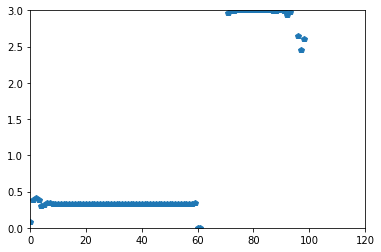

In [34]:
# copying to python array to take a elementwise division
EsLB_2 = np.zeros(cells, dtype=complex)
EsLA_2 = np.zeros(cells, dtype=complex)

Vtol = 1E-13
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_2[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_2[i] = EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_2, EsLA_2))
#Ratio_Array = np.abs(np.divide(EsLA_2, EsLB_2))

plt.plot(x_subL_2, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 120)
plt.ylim(0, 3)
plt.show()

In [35]:
Ratio_Array

array([ 0.07866666,  0.38410822,  0.4066985 ,  0.37734052,  0.3008842 ,
        0.31946133,  0.33627952,  0.34090679,  0.33369184,  0.33115298,
        0.33236047,  0.33382971,  0.33373953,  0.33325336,  0.33311806,
        0.3332567 ,  0.33333963,  0.33331843,  0.33328245,  0.33327961,
        0.333291  ,  0.33329545,  0.33329278,  0.33329048,  0.33329071,
        0.33329158,  0.33329175,  0.33329151,  0.33329137,  0.33329142,
        0.33329148,  0.33329148,  0.33329146,  0.33329145,  0.33329146,
        0.33329145,  0.33329145,  0.33329145,  0.33329147,  0.33329148,
        0.33329148,  0.33329136,  0.33329182,  0.33329217,  0.33329179,
        0.33329167,  0.33329047,  0.33329062,  0.33328982,  0.33327841,
        0.33328583,  0.33330753,  0.33329173,  0.33329534,  0.33325729,
        0.33338464,  0.3334031 ,  0.33377863,  0.33391876,  0.33549694,
        0.        ,  0.        ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


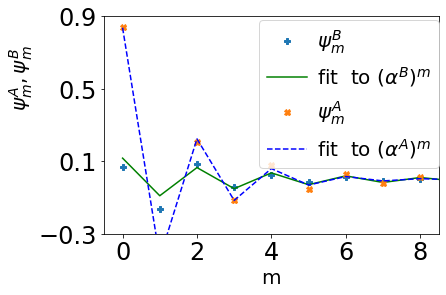

<Figure size 144x144 with 0 Axes>

In [36]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_2, pcov_LB_2 = curve_fit(func, x_subL_2, EsLB_2, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_2, pcov_LA_2 = curve_fit(func, x_subL_2, EsLA_2, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_2, EsLB_2+0.00, 'P',label="StateB")
plt.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_2))
plt.plot(x_subL_2, EsLA_2+0.000, 'X',label="StateA")
plt.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_2))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.3, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("               $\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.03), prop={'size': 20} );
ax.yaxis.set_major_locator(LinearLocator(4))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_2.png')

## $J_2$=-0.5

In [37]:
cells = 100
J1 = -0.
t_A = J1
t_B = t_A
J2 = -0.5
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham3 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_3 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham3)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

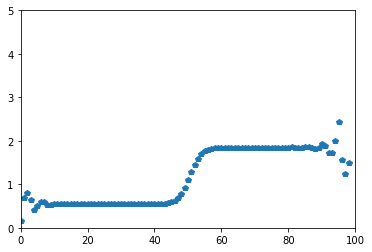

In [38]:
# copying to python array to take a elementwise division
EsLB_3 = np.zeros(cells, dtype=complex)
EsLA_3 = np.zeros(cells, dtype=complex)

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_3[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_3[i] = EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_3, EsLA_3))
#Ratio_Array = np.abs(np.divide(EsLA_3, EsLB_3))

plt.plot(x_subL_3, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 5)
plt.show()

In [39]:
Ratio_Array

array([0.14531046, 0.67486954, 0.80724472, 0.64415295, 0.41030989,
       0.50213984, 0.58201911, 0.58387082, 0.52906322, 0.52186177,
       0.54169032, 0.55224428, 0.54465738, 0.53787542, 0.53955832,
       0.54331419, 0.54348447, 0.54173359, 0.54117783, 0.54187358,
       0.54232443, 0.54211173, 0.5418375 , 0.54186689, 0.54200639,
       0.54202985, 0.54196936, 0.54194255, 0.54196553, 0.54198651,
       0.54198456, 0.54198023, 0.54199125, 0.54201645, 0.54205408,
       0.54211696, 0.54223215, 0.54244164, 0.54281694, 0.54348826,
       0.54469075, 0.54684326, 0.55068763, 0.55752794, 0.56962066,
       0.59075676, 0.62697274, 0.68696541, 0.78099121, 0.91628386,
       1.08880341, 1.27784178, 1.45347139, 1.59333126, 1.6916554 ,
       1.75487919, 1.79323172, 1.8156803 , 1.82854608, 1.83583003,
       1.83992458, 1.84221844, 1.8435033 , 1.84422128, 1.84461637,
       1.84483212, 1.8449612 , 1.84504754, 1.84508537, 1.84507079,
       1.84506426, 1.84513573, 1.84521399, 1.84512274, 1.84491

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


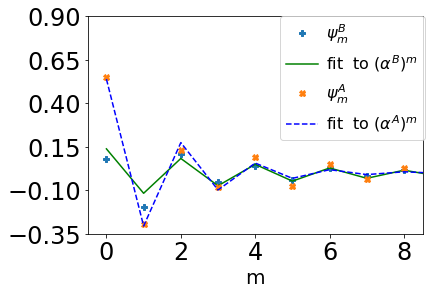

<Figure size 144x144 with 0 Axes>

In [40]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_3, pcov_LB_3 = curve_fit(func, x_subL_3, EsLB_3, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_3, pcov_LA_3 = curve_fit(func, x_subL_3, EsLA_3, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_3, EsLB_3+0.00, 'P',label="StateB")
plt.plot(x_subL_3, func(x_subL_3, *popt_LB_3), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_3))
plt.plot(x_subL_3, EsLA_3+0.000, 'X',label="StateA")
plt.plot(x_subL_3, func(x_subL_3, *popt_LA_3), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_3))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1$=-0.66

In [41]:
cells = 100
J1 = -0.
t_A = J1
t_B = t_A
J2 = -0.66
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham3 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_6 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham3)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]



do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

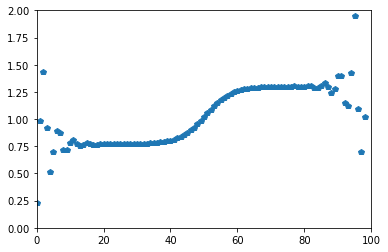

In [42]:
# copying to python array to take a elementwise division
EsLB_6 = np.zeros(cells, dtype=complex)
EsLA_6 = np.zeros(cells, dtype=complex)


neg6 = -1 # flipping the sign for later convenience

Vtol = 1E-10
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_6[i] = neg6 * EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_6[i] = neg6 * EsLA_f[i,0]

Ratio_Array = np.abs(np.divide(EsLB_6, EsLA_6))
#Ratio_Array = np.abs(np.divide(EsLA_6, EsLB_6))

plt.plot(x_subL_6, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 100)
plt.ylim(0, 2)
plt.show()

In [43]:
Ratio_Array

array([0.22870801, 0.97937144, 1.43567399, 0.91862325, 0.51302788,
       0.70134622, 0.89428844, 0.86945193, 0.7161671 , 0.71520511,
       0.78263843, 0.80678038, 0.77072766, 0.75023706, 0.76424046,
       0.77918213, 0.7750443 , 0.76568993, 0.76577004, 0.77095543,
       0.7722562 , 0.76974793, 0.76850381, 0.76969353, 0.77081603,
       0.77061491, 0.77018079, 0.77049342, 0.77120817, 0.77172576,
       0.77212382, 0.77279752, 0.77385718, 0.77518395, 0.77678025,
       0.77882975, 0.78152424, 0.78499471, 0.78939689, 0.79497638,
       0.80204224, 0.81092575, 0.8219788 , 0.83557883, 0.85209877,
       0.87184609, 0.89499477, 0.92151913, 0.95113379, 0.98325756,
       1.01702753, 1.0513768 , 1.08516467, 1.11732496, 1.14699144,
       1.17357288, 1.19677518, 1.21657639, 1.23315852, 1.24681713,
       1.257899  , 1.26678989, 1.27389394, 1.27955085, 1.28397765,
       1.28736538, 1.29001639, 1.2922281 , 1.294     , 1.29512907,
       1.2957971 , 1.29666676, 1.29786962, 1.29839644, 1.29766

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


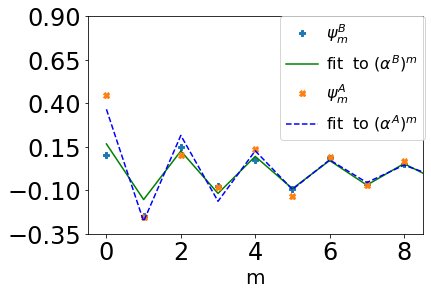

<Figure size 144x144 with 0 Axes>

In [44]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_6, pcov_LB_6 = curve_fit(func, x_subL_6, EsLB_6, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_6, pcov_LA_6 = curve_fit(func, x_subL_6, EsLA_6, p0 = (np.sqrt(3)/2, 1/3, 1))

fig, ax = subplots()
plt.plot(x_subL_6, EsLB_6+0.00, 'P',label="StateB")
plt.plot(x_subL_6, func(x_subL_6, *popt_LB_6), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_6))
plt.plot(x_subL_6, EsLA_6+0.000, 'X',label="StateA")
plt.plot(x_subL_6, func(x_subL_6, *popt_LA_6), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_6))

plt.xlim(-0.5, 8.5)
plt.ylim(-0.35, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.03, 1.04), prop={'size': 16} );
ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneP_3.png')

## $J_1=-0.1$, $J_2=-0.1$

In [45]:
cells = 100
J1 = -0.1
t_A = J1
t_B = t_A
J2 = -0.1
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham4 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_4 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham4)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]
    
do_flip = True
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_9966/3121808988.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_4, EsLB_4))
/tmp/ipykernel_9966/3121808988.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_4, EsLB_4))


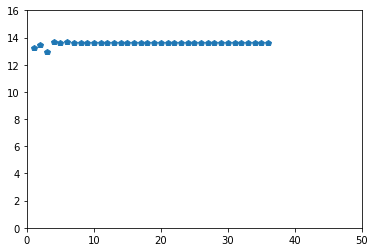

In [46]:
# copying to python array to take a elementwise division
EsLB_4 = np.zeros(cells, dtype=complex)
EsLA_4 = np.zeros(cells, dtype=complex)

Vtol = 1E-12
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_4[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_4[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_4, EsLA_4))
Ratio_Array = np.abs(np.divide(EsLA_4, EsLB_4))

plt.plot(x_subL_4, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 50)
plt.ylim(0, 16)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


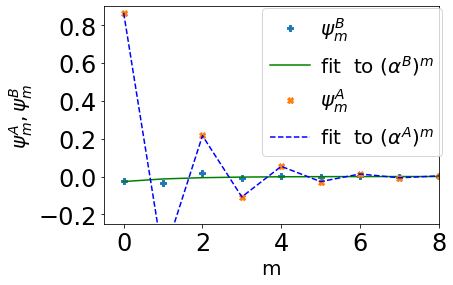

<Figure size 144x144 with 0 Axes>

In [47]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_4, pcov_LB_4 = curve_fit(func, x_subL_4, EsLB_4, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_4, pcov_LA_4 = curve_fit(func, x_subL_4, EsLA_4, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_4, EsLB_4+0.00, 'P',label="StateB")
plt.plot(x_subL_4, func(x_subL_4, *popt_LB_4), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_4))
plt.plot(x_subL_4, EsLA_4+0.000, 'X',label="StateA")
plt.plot(x_subL_4, func(x_subL_4, *popt_LA_4), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_4))

plt.xlim(-0.5, 8)
plt.ylim(-0.25, 0.9)

ax.set_xlabel('m', **axis_font);
ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.04, 1.04), prop={'size': 20} );
#ax.yaxis.set_major_locator(LinearLocator(6))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneTwoP.png')

## $J_1$=-0.20, $J_2$=-0.20

In [48]:
cells = 100
J1 = -0.2
t_A = J1
t_B = t_A
J2 = -0.2
t_AA = J2
t_BB = t_AA
T_inter_cell_0 =  np.array([[t_B, 0], [t_inter, t_A]]) 
T_inter_cell_1 =  np.array([[t_B, t_inter], [0, t_A]])
T_inter_cell_2 =  np.array([[t_BB, 0], [0, t_AA]]) 
T_inter_cell_3 =  np.array([[t_BB, 0], [0, t_AA]])
D = np.eye(cells)
dT = np.diag(np.zeros(cells-1)+1, 1)   # for placing tR
dTdag = np.diag(np.zeros(cells-1)+1, -1)  # for placing tL
sT = np.diag(np.zeros(cells-2)+1, 2)
sTdag = np.diag(np.zeros(cells-2)+1, -2)
Latt_Ham5 = np.kron(D, Hcell) + np.kron(dT, T_inter_cell_0) + np.kron(dTdag, T_inter_cell_1) \
 + np.kron(sT, T_inter_cell_2) + np.kron(sTdag, T_inter_cell_3)
# Lattice position vectors
x_eig = np.linspace(0, 2*cells-1, 2*cells)
x_subL_5 = np.linspace(0, cells-1, cells)
###############################################
eigenvalues, eigenvectors = LA.eig(Latt_Ham5)
# sorting
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
indx_no = cells - 1
EDG = eigenvectors[:,indx_no]
EDG = np.transpose(np.matrix(EDG))
###############################################
PB_L = np.kron(np.eye(int(cells)), b21)
PA_L = np.kron(np.eye(int(cells)), b20)
###############################################
Es_LB = PB_L*EDG
Es_LA = PA_L*EDG
EsLB = Es_LB[1:2*cells:2]
EsLA = Es_LA[0:2*cells:2]

    
do_flip = False
if do_flip:
    EsLA_f = np.transpose(np.fliplr(np.transpose(EsLB)))
    EsLB_f = np.transpose(np.fliplr(np.transpose(EsLA)))
else:
    EsLB_f = EsLB
    EsLA_f = EsLA

/tmp/ipykernel_9966/3342259155.py:13: RuntimeWarning: divide by zero encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))
/tmp/ipykernel_9966/3342259155.py:13: RuntimeWarning: invalid value encountered in true_divide
  Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))


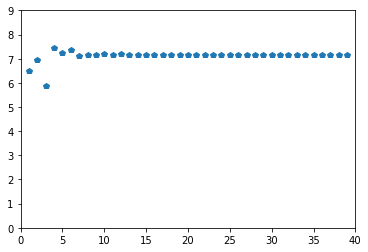

In [49]:
# copying to python array to take a elementwise division
EsLB_5 = np.zeros(cells, dtype=complex)
EsLA_5 = np.zeros(cells, dtype=complex)

Vtol = 1E-12
for i in range(cells):
    if np.abs(EsLB_f[i, 0]) > Vtol:
        EsLB_5[i] = EsLB_f[i,0]
    if np.abs(EsLA_f[i, 0]) > Vtol:
        EsLA_5[i] = EsLA_f[i,0]

#Ratio_Array = np.abs(np.divide(EsLB_5, EsLA_5))
Ratio_Array = np.abs(np.divide(EsLA_5, EsLB_5))

plt.plot(x_subL_5, Ratio_Array, 'p',label="StateA")
plt.xlim(0, 40)
plt.ylim(0, 9)
plt.show()

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


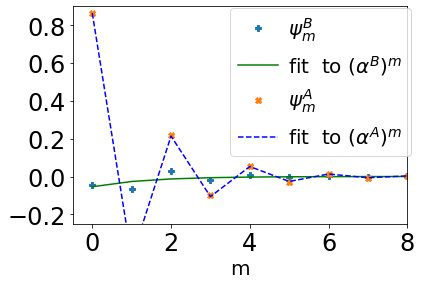

<Figure size 144x144 with 0 Axes>

In [50]:
axis_font = {'size':'20'}
###############################################################################
popt_LB_5, pcov_LB_5 = curve_fit(func, x_subL_5, EsLB_5, p0 = (np.sqrt(3)/2, 1/3, 1))
popt_LA_5, pcov_LA_5 = curve_fit(func, x_subL_5, EsLA_5, p0 = (np.sqrt(3)/2, 1/3, 1))


fig, ax = subplots()
plt.plot(x_subL_5, EsLB_5+0.00, 'P',label="StateB")
plt.plot(x_subL_5, func(x_subL_5, *popt_LB_5), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LB_5))
plt.plot(x_subL_5, EsLA_5+0.000, 'X',label="StateA")
plt.plot(x_subL_5, func(x_subL_5, *popt_LA_5), 'b--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_LA_5))

plt.xlim(-0.5, 8)
plt.ylim(-0.25, 0.9)

ax.set_xlabel('m', **axis_font);
#ax.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font);
plt.tick_params(labelsize=18)
ax.legend(("$\psi^{B}_m$",r"fit  to $(\alpha^B)^m$",
           "$\psi^{A}_m$",r"fit  to $(\alpha^A)^m$") 
           ,loc='upper right', handletextpad=0.5, bbox_to_anchor=(1.04, 1.04), prop={'size': 20} );
#ax.yaxis.set_major_locator(LinearLocator(5))
#ax.xaxis.set_major_formatter('{x:.01f}')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.figure(figsize=(2,2))
#show()
plt.savefig('OneTwoP_1.png')

## The figure in the letter

##  (b) $J_1$=0.0, $J_2$=-0.1, (c) $J_1$=0.0, $J_2$=-0.2, (d) $J_1$=0.0, $J_2$=-0.5

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

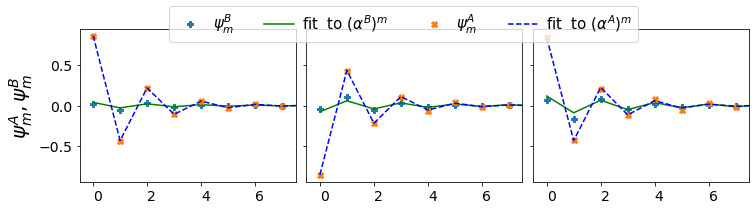

In [51]:
fig, (a1,a2,a3) = plt.subplots(1,3,sharey=True)
#(fig1, fig2, fig3), axx = plt.subplots(3)
sasp = 3

fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.subplots_adjust(wspace=0.05)



#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

a1.plot(x_subL_0, EsLB_0+0.00, 'P')
a1.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'g-')
a1.plot(x_subL_0, EsLA_0+0.000, 'X')
a1.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'b--')
a1.set_aspect(sasp)
a1.set_xlim(-0.5,7.5)
plt.setp(a1.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a1.get_yticklabels(), fontsize=14)
a1.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)

#a1.set_xticklabels(np.arange(cells), fontsize=12)

#a1.set_xticks(fontsize=12)
#a1.set_yticks(fontsize=12)

a2.plot(x_subL_1, EsLB_1+0.00, 'P')
a2.plot(x_subL_1, func(x_subL_1, *popt_LB_1), 'g-')
a2.plot(x_subL_1, EsLA_1+0.000, 'X')
a2.plot(x_subL_1, func(x_subL_1, *popt_LA_1), 'b--')
a2.set_aspect(sasp)
a2.set_xlim(-0.5,7.5)
plt.setp(a2.get_xticklabels(), fontsize=14, horizontalalignment="left")

#a2.set_xticklabels([-1,2,5,8,10], fontsize=12)

a3.plot(x_subL_2, EsLB_2+0.00, 'P',label="$\psi^{B}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-', label=r"fit  to $(\alpha^B)^m$")
a3.plot(x_subL_2, EsLA_2+0.000, 'X',label="$\psi^{A}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--', label=r"fit  to $(\alpha^A)^m$")
a3.set_aspect(sasp)
a3.set_xlim(-0.5,7.5)
plt.setp(a3.get_xticklabels(), fontsize=14, horizontalalignment="left")

#a3.set_xticklabels([-1,2,5,8,10], fontsize=12)

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#fig.legend(lines, labels, loc='upper center', ncol=4)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=4, handletextpad=0.525, bbox_to_anchor=(0.5, 0.65), prop={'size': 15} )
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
#plt.figure(figsize=(8,3), dpi=800)
plt.show()


##  (a) $J_1$=0.0, $J_2$=-0.1, (b) $J_1$=0.0, $J_2$=-0.2,  (c) $J_1$=0.0, $J_2$=-0.3, (d) $J_1$=0.0, $J_2$=-0.4, (e) $J_1$=0.0, $J_2$=-0.5

/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/saumya/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False

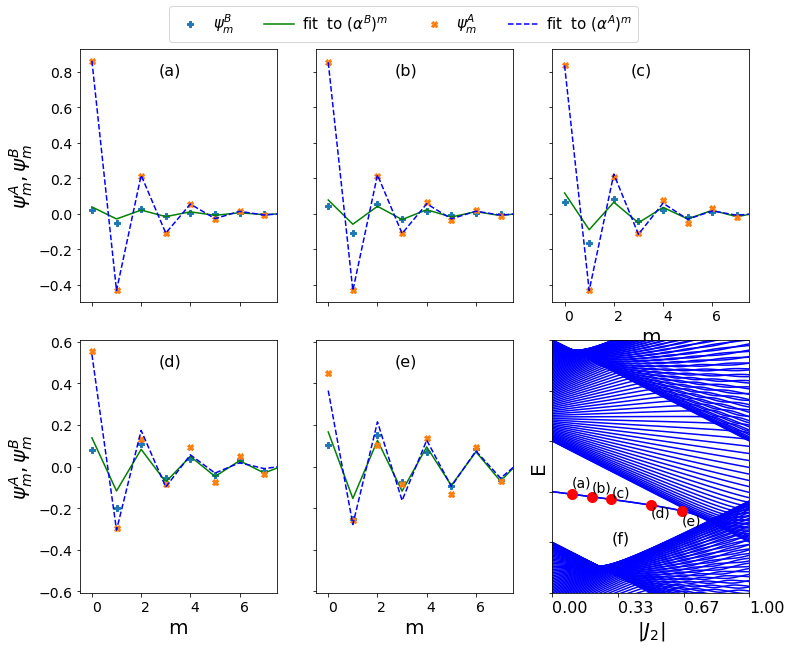

In [53]:
axis_font = {'size':'20'}

fig = plt.figure()

a1 = fig.add_subplot(2, 3, 1)
a2 = fig.add_subplot(2, 3, 2, sharey = a1)
a3 = fig.add_subplot(2, 3, 3, sharey = a1)

a4 = fig.add_subplot(2, 3, 4, sharex = a1)
a5 = fig.add_subplot(2, 3, 5, sharex = a2, sharey = a4)
a6 = fig.add_subplot(2, 3, 6)

plt.subplots_adjust(wspace=0.2, hspace=0.15)
#fig, (a1,a2,a3,a4,a5,a6) = plt.subplots(2,3,sharey=True)
#(fig1, fig2, fig3), axx = plt.subplots(3)
sasp = 3

fig = plt.gcf()
fig.set_size_inches(12, 10)
#fig.subplots_adjust(wspace=0.08, hspace=0)



#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

a1.plot(x_subL_0, EsLB_0+0.00, 'P')
a1.plot(x_subL_0, func(x_subL_0, *popt_LB_0), 'g-')
a1.plot(x_subL_0, EsLA_0+0.000, 'X')
a1.plot(x_subL_0, func(x_subL_0, *popt_LA_0), 'b--')
#a1.set_aspect(sasp)
a1.set_xlim(-0.5,7.5)
plt.setp(a1.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a1.get_yticklabels(), fontsize=14)
a1.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
#a1.xaxis.set_major_formatter(plt.NullFormatter())


#a1.set_xticklabels(np.arange(cells), fontsize=12)

#a1.set_xticks(fontsize=12)
#a1.set_yticks(fontsize=12)

a2.plot(x_subL_1, -EsLB_1+0.00, 'P')
a2.plot(x_subL_1, -func(x_subL_1, *popt_LB_1), 'g-')
a2.plot(x_subL_1, -EsLA_1+0.000, 'X')
a2.plot(x_subL_1, -func(x_subL_1, *popt_LA_1), 'b--')
#a2.set_aspect(sasp)
a2.set_xlim(-0.5,7.5)
plt.setp(a2.get_xticklabels(), fontsize=14, horizontalalignment="left", visible=False)
plt.setp(a2.get_yticklabels(), fontsize=14, visible=False)
#a2.xaxis.set_major_formatter(plt.NullFormatter())
#a2.set_xticklabels([-1,2,5,8,10], fontsize=12)

#a1.axis('off')


a3.plot(x_subL_2, EsLB_2+0.00, 'P',label="$\psi^{B}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LB_2), 'g-', label=r"fit  to $(\alpha^B)^m$")
a3.plot(x_subL_2, EsLA_2+0.000, 'X',label="$\psi^{A}_m$")
a3.plot(x_subL_2, func(x_subL_2, *popt_LA_2), 'b--', label=r"fit  to $(\alpha^A)^m$")
#a3.set_aspect(sasp)
a3.set_xlim(-0.5,7.5)
plt.setp(a3.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a3.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a3.set_xlabel('m', **axis_font);

a4.plot(x_subL_3, EsLB_3+0.00, 'P')
a4.plot(x_subL_3, func(x_subL_3, *popt_LB_3), 'g-')
a4.plot(x_subL_3, EsLA_3+0.000, 'X')
a4.plot(x_subL_3, func(x_subL_3, *popt_LA_3), 'b--')
#a4.set_aspect(sasp)
a4.set_xlim(-0.5,7.5)
plt.setp(a4.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a4.get_yticklabels(), fontsize=14)
a4.set_ylabel("$\psi^{A}_m,\psi^{B}_m$", **axis_font)
plt.xticks(fontsize=16)
a4.set_xlabel('m', **axis_font)

#a4.set_xticklabels(np.arange(cells), fontsize=12)

#a4.set_xticks(fontsize=12)
#a4.set_yticks(fontsize=12)

a5.plot(x_subL_6, EsLB_6+0.00, 'P')
a5.plot(x_subL_6, func(x_subL_6, *popt_LB_6), 'g-')
a5.plot(x_subL_6, EsLA_6+0.000, 'X')
a5.plot(x_subL_6, func(x_subL_6, *popt_LA_6), 'b--')
#a5.set_aspect(sasp)
a5.set_xlim(-0.5,7.5)
plt.setp(a5.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a5.get_yticklabels(), fontsize=14, visible=False)
plt.xticks(fontsize=16)
a5.set_xlabel('m', **axis_font);





a6.plot(np.abs(tAA_array).T, Ess.T, 'b-')
a6.plot(0.1,-0.05009,'ro', markersize=10)
a6.plot(0.2,-0.10078,'ro', markersize=10)
a6.plot(-tAA_array[0,30],Ess[cells,30],'ro', markersize=10)
a6.plot(0.5,-0.26584,'ro', markersize=10)
a6.plot(-tAA_array[0,66],Ess[cells,66],'ro', markersize=10)

#a6.set_aspect(sasp)
a6.set_xlim(0,1)
a6.set_ylim(-2,3)
plt.setp(a6.get_xticklabels(), fontsize=14, horizontalalignment="left")
plt.setp(a6.get_yticklabels(), fontsize=14, visible=False)
a6.xaxis.set_major_locator(LinearLocator(4))
a6.xaxis.set_major_formatter('{x:.02f}')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
a6.set_xlabel('$|J_2|$', **axis_font);
a6.set_ylabel("E", **axis_font)

plt.text(0.4, 0.90, "(a)", fontsize=16, transform=a1.transAxes)
plt.text(0.4, 0.90, "(b)", fontsize=16, transform=a2.transAxes)
plt.text(0.4, 0.90, "(c)", fontsize=16, transform=a3.transAxes)
plt.text(0.4, 0.90, "(d)", fontsize=16, transform=a4.transAxes)
plt.text(0.4, 0.90, "(e)", fontsize=16, transform=a5.transAxes)
plt.text(0.3, 0.20, "(f)", fontsize=16, transform=a6.transAxes)




plt.text(0.1,0.42, "(a)", fontsize=14, transform=a6.transAxes)
plt.text(0.2,0.40, "(b)", fontsize=14, transform=a6.transAxes)
plt.text(0.3,0.38, "(c)", fontsize=14, transform=a6.transAxes)
plt.text(0.5,0.30, "(d)", fontsize=14, transform=a6.transAxes)
plt.text(0.66,0.27, "(e)", fontsize=14, transform=a6.transAxes)

#a4.text(0.45, 1.1, string.ascii_uppercase[3]

#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#fig.legend(lines, labels, loc='upper center', ncol=4)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=4, handletextpad=0.525, bbox_to_anchor=(0.5, 0.95), prop={'size': 15} )
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)
#plt.figure(figsize=(8,3), dpi=800)
plt.savefig("TP_dr_A.pdf", format="pdf", bbox_inches="tight")
plt.show()
